In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [46]:
# Load dataset
train = pd.read_csv(r"C:\Users\ektas\Downloads\titanic\train.csv")

# 1. Basic Information
train.shape
train.head()
train.info()
train.describe()

# Missing values check
train.isnull().sum()

# Drop rows with missing values for simplicity
train.dropna()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


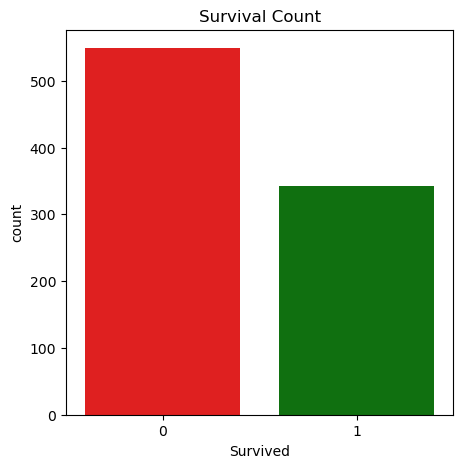

In [47]:

# 2. Univariate Analysis
# Survival Count
plt.figure(figsize=(5,5))
sns.countplot(x='Survived', hue='Survived', data=train, palette=['red','green'], legend=False)
plt.title("Survival Count")
plt.show()

# Observation: More passengers (~62%) did not survive, only around 38% survived.


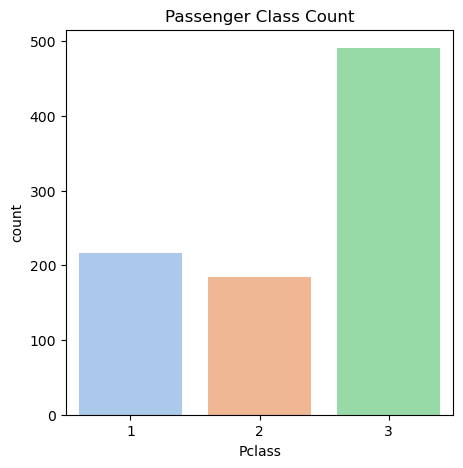

In [48]:
plt.figure(figsize=(5,5))
sns.countplot(x='Pclass', hue='Pclass', data=train, palette='pastel', legend=False)
plt.title("Passenger Class Count")
plt.show()
# Observation: Most passengers were from the 3rd class, followed by 1st and 2nd class. Lower-class passengers were the majority.

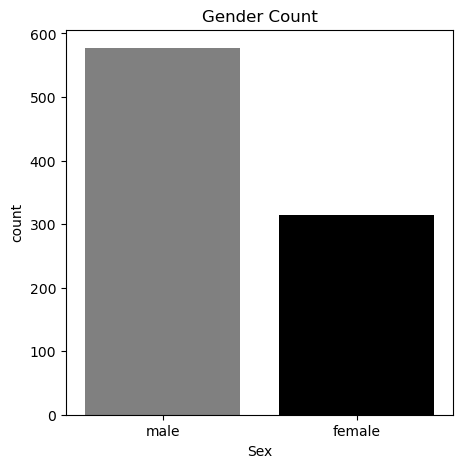

In [49]:
# Gender Count
plt.figure(figsize=(5,5))
sns.countplot(x='Sex', hue='Sex',data=train, palette=['grey','black'],legend=False)
plt.title("Gender Count")
plt.show()
# Observation: There were significantly more male passengers than female passengers, indicating a gender imbalance.

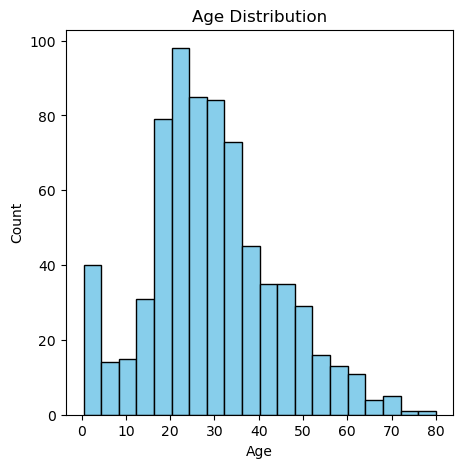

In [50]:
# Age Distribution
plt.figure(figsize=(5,5))
plt.hist(train['Age'], bins=20, color='skyblue', edgecolor='black')
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()
# Observation: Most passengers were aged between 20–40 years. Very few children and senior citizens were on board.

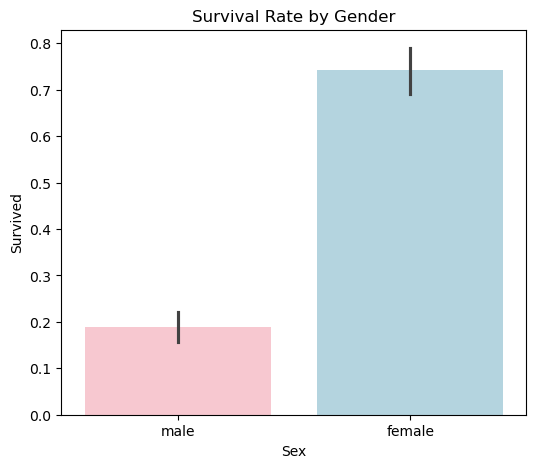

In [51]:
# 3. Bivariate Analysis
# Survival Rate by Gender
plt.figure(figsize=(6,5))
sns.barplot(x='Sex', y='Survived', hue='Sex', data=train, palette=['pink','lightblue'], legend=False)
plt.title("Survival Rate by Gender")
plt.show()
# Observation: Female passengers had a much higher survival rate than males, reflecting the 'Women and Children First' policy.



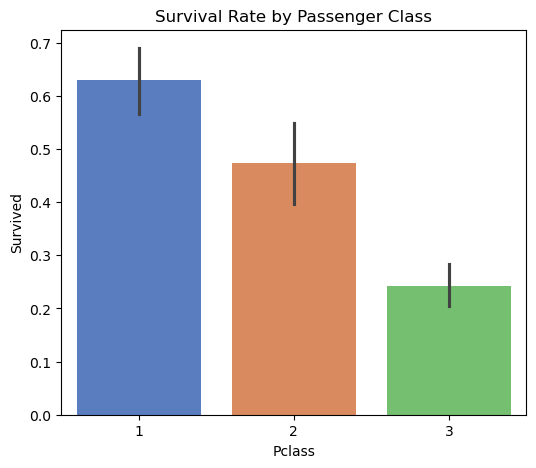

In [52]:
# Survival Rate by Passenger Class
plt.figure(figsize=(6,5))
sns.barplot(x='Pclass', y='Survived', hue='Pclass', data=train, palette='muted', legend=False)
plt.title("Survival Rate by Passenger Class")
plt.show()
# Observation: 1st-class passengers had the highest survival rate, while 3rd-class had the lowest.


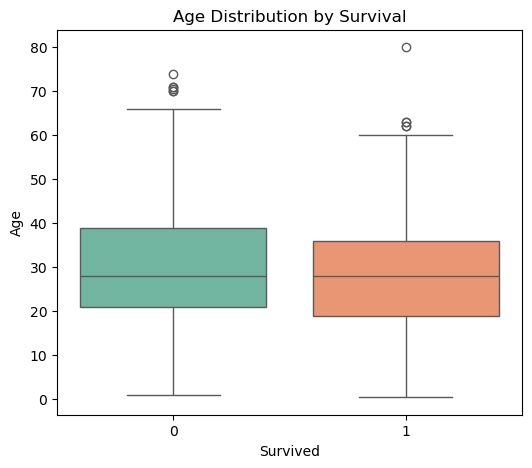

In [53]:
plt.figure(figsize=(6,5))
sns.boxplot(x='Survived', y='Age', hue='Survived', data=train, palette='Set2', legend=False)
plt.title("Age Distribution by Survival")
plt.show()
# Observation: Younger passengers had slightly better chances of survival, but survivors were present in all age groups.

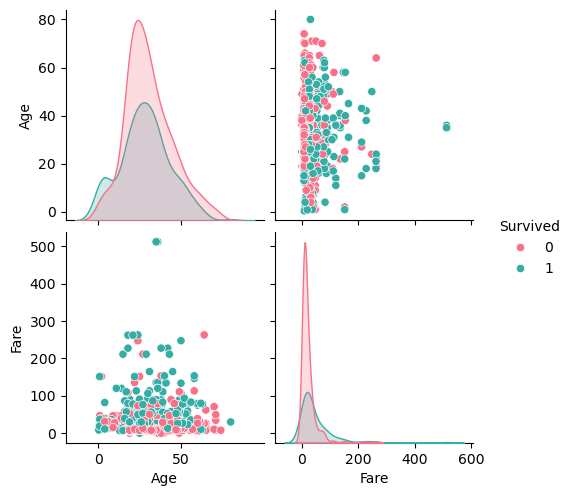

In [54]:
# 4. Multivariate Analysis
# Pairplot
sns.pairplot(train[['Survived','Age','Fare']], hue='Survived', palette='husl')
plt.show()
# Observation: Passengers who paid higher fares generally had better survival chances. No strong relationship between Age and Fare.

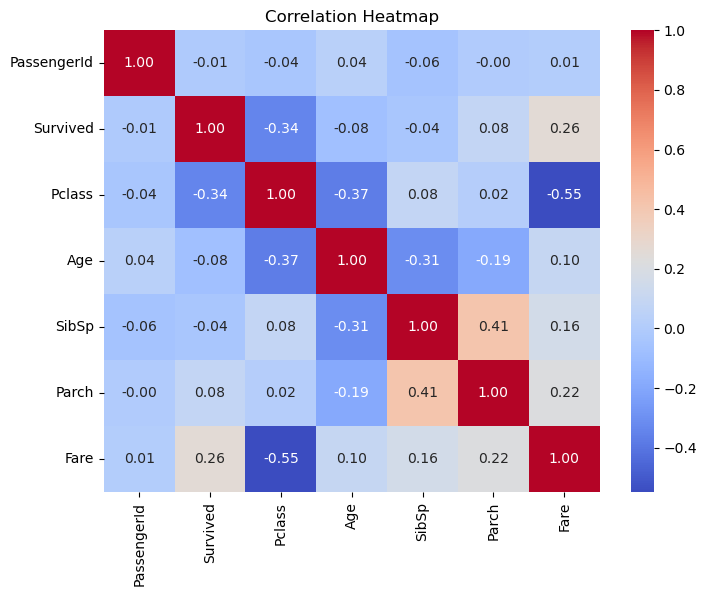

In [55]:
# Correlation Heatmap
# Select only numeric columns
numeric_df = train.select_dtypes(include=['int64', 'float64'])

plt.figure(figsize=(8,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()
# Observation: Survival is positively correlated with Fare and negatively correlated with Pclass, meaning lower-class passengers were less likely to survive.")

